In [156]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [158]:
data=pd.read_csv("loan_approval_dataset.csv")
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [161]:
data.isna().any()

loan_id                      False
 no_of_dependents            False
 education                   False
 self_employed               False
 income_annum                False
 loan_amount                 False
 loan_term                   False
 cibil_score                 False
 residential_assets_value    False
 commercial_assets_value     False
 luxury_assets_value         False
 bank_asset_value            False
 loan_status                 False
dtype: bool

In [162]:
data.duplicated().any()

False

In [163]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [164]:
data.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [165]:
data.describe

<bound method NDFrame.describe of       loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        92000

In [166]:
data.drop(["loan_id"],axis=1,inplace=True)
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [167]:
obj1=LabelEncoder()
obj2=LabelEncoder()

In [168]:
data[" education"]=obj1.fit_transform(data[" education"])
data[" self_employed"]=obj2.fit_transform(data[" self_employed"])
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [169]:
data.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [170]:
data.dtypes

no_of_dependents             int64
education                    int32
self_employed                int32
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

# VISUALISING DATA BY MATPLOTLIB

In [172]:
data1=data.drop([' no_of_dependents', ' education', ' self_employed',' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value',],axis=1)
data1

,income_annum,loan_status
0,9600000,Approved
1,4100000,Rejected
2,9100000,Rejected
3,8200000,Rejected
4,9800000,Rejected
...,...,...
4264,1000000,Rejected
4265,3300000,Approved
4266,6500000,Rejected
4267,4100000,Approved


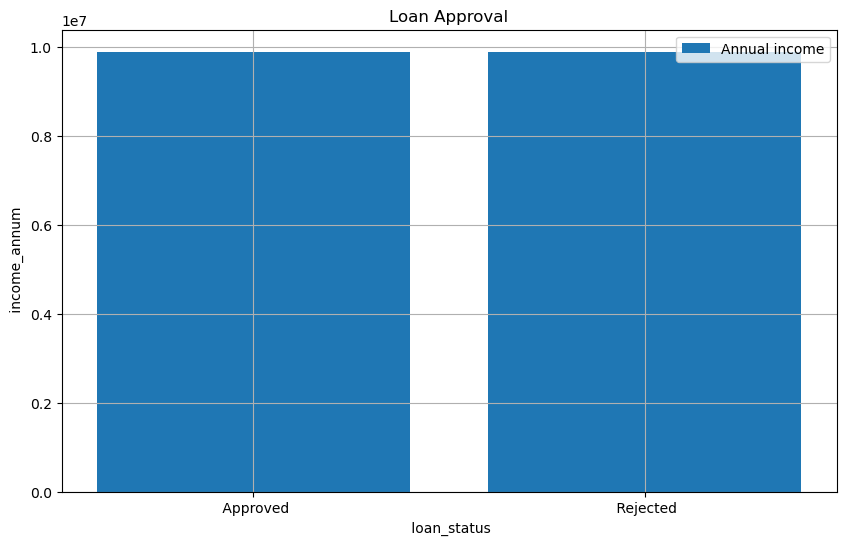

In [173]:
x=data1[ ' loan_status']
y=data1[ ' income_annum']
plt.figure(figsize=(10,6))
plt.bar(x,y,label="Annual income")
plt.title("Loan Approval")
plt.xlabel( ' loan_status')
plt.ylabel( ' income_annum')
plt.legend()
plt.grid(True)
plt.show() 

# Setting Target Value

In [175]:
x=data.drop(columns=[ ' loan_status'])
y=data[ ' loan_status']

In [176]:
x

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [177]:
y

0        Approved
1        Rejected
2        Rejected
3        Rejected
4        Rejected
          ...    
4264     Rejected
4265     Approved
4266     Rejected
4267     Approved
4268     Approved
Name:  loan_status, Length: 4269, dtype: object

In [178]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

# FITTING MODEL

# Logistic Regression

In [181]:
from sklearn.linear_model import LogisticRegression

In [182]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [183]:
logistictest=model.score(xtest,ytest)
logistictest

0.726775956284153

In [184]:
logistictrain=model.score(xtrain,ytrain)
logistictrain

0.7369477911646586

# Decision tree Classifier

In [186]:
from sklearn.tree import DecisionTreeClassifier

In [187]:
model1=DecisionTreeClassifier()
model1.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [188]:
decisiontest=model1.score(xtest,ytest)
decisiontest

0.9750195160031225

In [189]:
decisiontrain=model1.score(xtrain,ytrain)
decisiontrain

1.0

# Random Forest Classifier

In [191]:
from sklearn.ensemble import RandomForestClassifier

In [193]:
model2=RandomForestClassifier()
model2.fit(xtrain,ytrain)

RandomForestClassifier()

In [196]:
randomtest=model2.score(xtest,ytest)
randomtest

0.9789227166276346

In [197]:
randomtrain=model2.score(xtrain,ytrain)
randomtrain

1.0

# SVM

In [199]:
from sklearn.svm import SVC

In [201]:
model3=SVC()
model3.fit(xtrain,ytrain)

SVC()

In [202]:
svctest=model3.score(xtest,ytest)
svctest

0.6323185011709602

In [204]:
svctrain=model3.score(xtrain,ytrain)
svctrain

0.6178045515394913

# KNN CLASSIFIER

In [208]:
from sklearn.neighbors import KNeighborsClassifier

In [211]:
model4=KNeighborsClassifier()
model4.fit(xtrain,ytrain)

KNeighborsClassifier()

In [214]:
knntest=model4.score(xtest,ytest)
knntest

0.5839188134270101

In [215]:
knntrain=model4.score(xtrain,ytrain)
knntrain

0.7172021419009371

# GAUSSIAN NB

In [218]:
from sklearn.naive_bayes import GaussianNB

In [219]:
model5=GaussianNB()
model5.fit(xtrain,ytrain)

GaussianNB()

In [220]:
gnbtest=model5.score(xtest,ytest)
gnbtest

0.7712724434035909

In [221]:
gnbtrain=model5.score(xtrain,ytrain)
gnbtrain

0.7754350736278447

# Adaboost Classifier

In [223]:
from sklearn.ensemble import AdaBoostClassifier

In [224]:
model6=AdaBoostClassifier()
model6.fit(xtrain,ytrain)

AdaBoostClassifier()

In [225]:
ABCTest=model6.score(xtest,ytest)
ABCTest

0.9648711943793911

In [226]:
ABCTrain=model6.score(xtrain,ytrain)
ABCTrain

0.9792503346720214

# GradientBoostClassifier

In [228]:
from sklearn.ensemble import GradientBoostingClassifier

In [229]:
model7=GradientBoostingClassifier(n_estimators=100,random_state=1)
model7.fit(xtrain,ytrain)

GradientBoostingClassifier(random_state=1)

In [230]:
gradienttest=model7.score(xtest,ytest)
gradienttest

0.9750195160031225

In [231]:
gradienttrain=model7.score(xtrain,ytrain)
gradienttrain

0.9956492637215528

# Prediction

In [233]:
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [234]:
#no of dependents=5
# education=1
# self_employed=1
# income_annum=9800000
# loan_amount=24200000
# loan_term=20
# cibil_score=382
# residential_assets_value=12400000
# commercial_assets_value=8200000
# Luxury_assets_value=29400000
# bank_asset_value=5000000

In [235]:
no_of_dependents=input("Enter no_of_dependents")   
no_of_dependents                                                                   

Enter no_of_dependents 5


'5'

In [236]:
education=input("Enter education")
education

Enter education 1


'1'

In [237]:
self_employed=input("Enter self_employed")
self_employed

Enter self_employed 1


'1'

In [238]:
income_annum=input("Enter  income_annum")
income_annum

Enter  income_annum 9800000


'9800000'

In [239]:
loan_amount=input("Enter loan_amount")
loan_amount

Enter loan_amount 24200000


'24200000'

In [247]:
loan_term=input("Enter loan_term")
loan_term

Enter loan_term 20


'20'

In [240]:
cibil_score=input("Enter cibil_score")
cibil_score

Enter cibil_score 382


'382'

In [241]:
residential_assets_value=input("Enter residential_assets_value")
residential_assets_value

Enter residential_assets_value 12400000


'12400000'

In [242]:
commercial_assets_value=input("Enter commercial_assets_value=")
commercial_assets_value

Enter commercial_assets_value= 8200000


'8200000'

In [270]:
luxury_assets_value=input("enter luxury_assets_value")
luxury_assets_value

enter Luxury_assets_value 29400000


'29400000'

In [244]:
 bank_asset_value=input("Enter  bank_asset_value")
 bank_asset_value

Enter  bank_asset_value 5000000


'5000000'

In [245]:
ypred=model.predict(xtest)
ypred

array([' Approved', ' Approved', ' Rejected', ..., ' Approved',
       ' Approved', ' Approved'], dtype=object)

scores=pd.DataFrame({"models":["LogisticRegression","DecisionTreeClassifier","RandomForestClassifier","KNeighborClassifier","AdaBoostClassifier","GradientBoostingClassifer"],
                     "Trainingscore":[Logistictrain,decisiontrain,randomtrain,KNtrain,Adaboosttrain,gradienttrain],
                     "testingscore":[Logistictest,decisiontest,randomtest,KNtest,Adaboosttest,gradienttest]})
scores

In [266]:
scores=pd.DataFrame({"models":["LogisticRegression","DecisionTreeClassifier","RandomForestClassifier","KNeighborClassifier","AdaBoostClassifier","GradientBoostingClassifer"],
                     "Trainingscore":[logistictrain,decisiontrain,randomtrain,knntrain,ABCTrain,gradienttrain],
                     "testingscore":[logistictest,decisiontest,randomtest,knntest,ABCTest,gradienttest]})
scores

,models,Trainingscore,testingscore
0,LogisticRegression,0.736948,0.726776
1,DecisionTreeClassifier,1.000000,0.975020
2,RandomForestClassifier,1.000000,0.978923
3,KNeighborClassifier,0.717202,0.583919
4,AdaBoostClassifier,0.979250,0.964871
5,GradientBoostingClassifer,0.995649,0.975020


In [282]:
print(model2.predict([[no_of_dependents,education,self_employed,income_annum,loan_amount,
                       loan_term,cibil_score,residential_assets_value,commercial_assets_value,
                       luxury_assets_value,bank_asset_value]]))

[' Rejected']


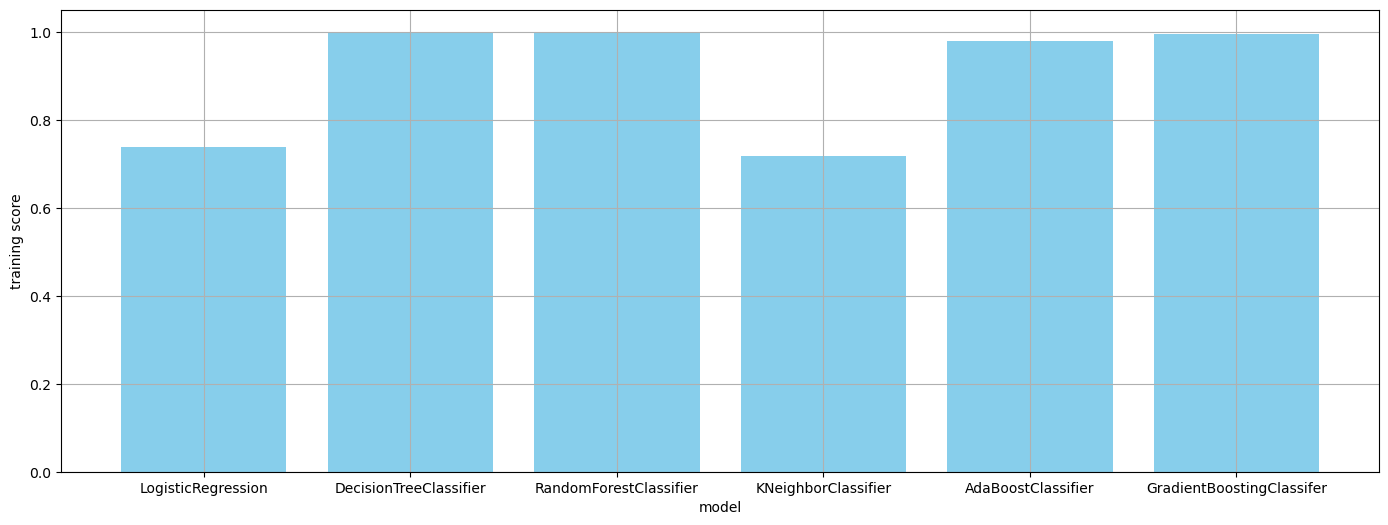

In [284]:
x=scores.models
y=scores.Trainingscore
plt.figure(figsize=(17,6))
plt.bar(x,y,color="skyblue")
plt.xlabel("model")
plt.ylabel("training score")
plt.grid(True)
plt.show()


In [ ]:
x=scores.models
y=scores.testingscore
plt.figure(figsize=(17,6))
plt.bar(x,y,color="cyan")
plt.xlabel("model")
plt.ylabel("testing score")
plt.grid(True)
plt.show()